In [1]:
# Python Imports
import matplotlib.pyplot as plt

# Scikit-Learn Imports
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, accuracy_score, confusion_matrix

# Transformer Imports
from datasets import load_dataset
from transformers import pipeline

# Loading Data

In [2]:
data_file = {"test": "./Data/TestingData.csv"}

In [3]:
test_dataset = load_dataset('csv', data_files=data_file)

In [4]:
test_dataset

DatasetDict({
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2337
    })
})

# Loading DistilBERT Model

In [5]:
trained_distilBERT = pipeline('text-classification',
                      model='./Models/distilBERT',
                      device=0)

# Getting DistilBERT Predictions

In [6]:
distilBERT_preds = trained_distilBERT(test_dataset['test']['sentence'])

In [7]:
# Method to convert Labels from format "Label_0" to "0"
def get_label(d):
    return int(d['label'].split('_')[1])

In [8]:
distilBERT_preds = [get_label(d) for d in distilBERT_preds]

# Plotting Confusion Matrix

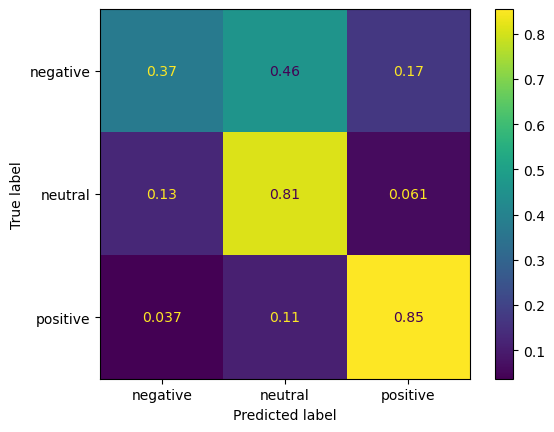

In [9]:
cm = confusion_matrix(test_dataset['test']['label'], distilBERT_preds, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['negative', 'neutral', 'positive'])
disp.plot()
plt.show()

# Loading BERT Model

In [10]:
trained_BERT = pipeline('text-classification',
                      model='./Models/BERTModel',
                      device=0)

# Getting BERT Predictions

In [11]:
bert_preds = trained_BERT(test_dataset['test']['sentence'])

In [12]:
bert_preds = [get_label(d) for d in bert_preds]

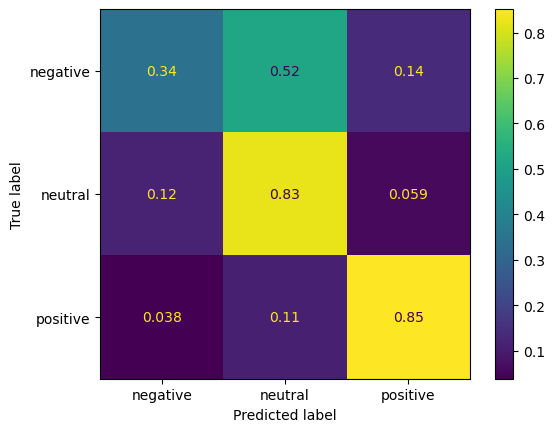

In [13]:
cm = confusion_matrix(test_dataset['test']['label'], bert_preds, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['negative', 'neutral', 'positive'])
disp.plot()
plt.show()

# Loading Large Bert Model

In [24]:
trained_LargeBERT = pipeline('text-classification',
                      model='./Models/LargeBERT',
                      device=0)

In [25]:
largeBERT_preds = trained_LargeBERT(test_dataset['test']['sentence'])

In [26]:
largeBERT_preds = [get_label(d) for d in largeBERT_preds]

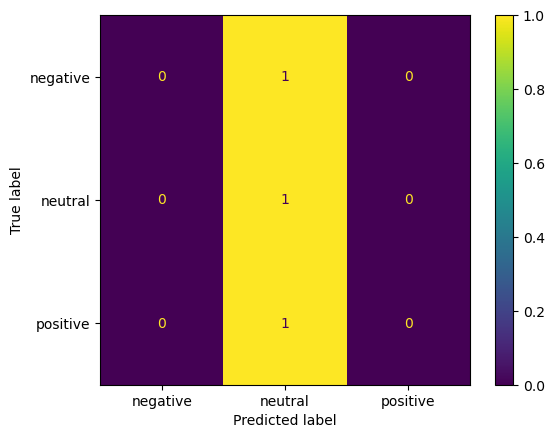

In [27]:
cm = confusion_matrix(test_dataset['test']['label'], largeBERT_preds, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['negative', 'neutral', 'positive'])
disp.plot()
plt.show()

In [18]:
trained_LargeBERT("This stock is horrible")

[{'label': 'LABEL_1', 'score': 0.5322597622871399}]

In [19]:
trained_BERT("This stock is horrible")

[{'label': 'LABEL_0', 'score': 0.9885333776473999}]

# Comparing Accuracy and F1 Scores

In [31]:
print("Accuracy:", accuracy_score(test_dataset['test']['label'], distilBERT_preds))
print("f1:", f1_score(test_dataset['test']['label'], distilBERT_preds, average='macro'))

Accuracy: 0.7595207531022679
f1: 0.6781241395996159


In [30]:
print("Accuracy:", accuracy_score(test_dataset['test']['label'], bert_preds))
print("f1:", f1_score(test_dataset['test']['label'], bert_preds, average='macro'))

Accuracy: 0.762943945228926
f1: 0.6763763202465637


In [32]:
print("Accuracy:", accuracy_score(test_dataset['test']['label'], largeBERT_preds))
print("f1:", f1_score(test_dataset['test']['label'], largeBERT_preds, average='macro'))

Accuracy: 0.5387248609328199
f1: 0.23340748980348536
